In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
x= np.array([5,15,25,35,45,55]).reshape((-1,1))
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y= np.array([5,20,14,32,22,38])
y

array([ 5, 20, 14, 32, 22, 38])

In [5]:
model = LinearRegression()

In [6]:
model = model.fit(x,y)


LinearRegression()

In [7]:
model =LinearRegression().fit(x,y)

In [8]:
r_sq = model.score(x,y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [9]:
print(f"intercept : {model.intercept_}")

intercept : 5.633333333333329


In [10]:
print(f"slope: {model.coef_}")

slope: [0.54]


In [11]:
y_pred = model.predict(x)
print(f"Predicted response: \n {y_pred}")

Predicted response: 
 [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [17]:
y_pred = model.intercept_ + model.coef_*x
print(f"predicted response:\n {y_pred}")

predicted response:
 [[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [12]:
#LOGISTIC REGRESSION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
#diabetes = load_diabetes()
#DataFrame = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
#print(DataFrame) OR

diabetes = load_diabetes(as_frame=True) #convert to df
features = diabetes['feature_names'] #every column except target
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
target = diabetes['target'] #target and features are 2 of the 4 attributes of diabetes
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [21]:
data= diabetes['data']
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [22]:
X,y = diabetes.data, diabetes.target
#X: features and target var y=binary var
#convert target var as binary: 1 diabetic, 0: no diabetes
y_binary = (y>np.median(y)).astype(int)

In [23]:
#split data 
X_train, X_test, y_train, y_test = train_test_split( #4 return types
X,y_binary, test_size= 0.2, random_state=42)  #0 to 42

In [24]:
#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
#evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%".format(accuracy * 100))

Accuracy : 73.03%


In [27]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



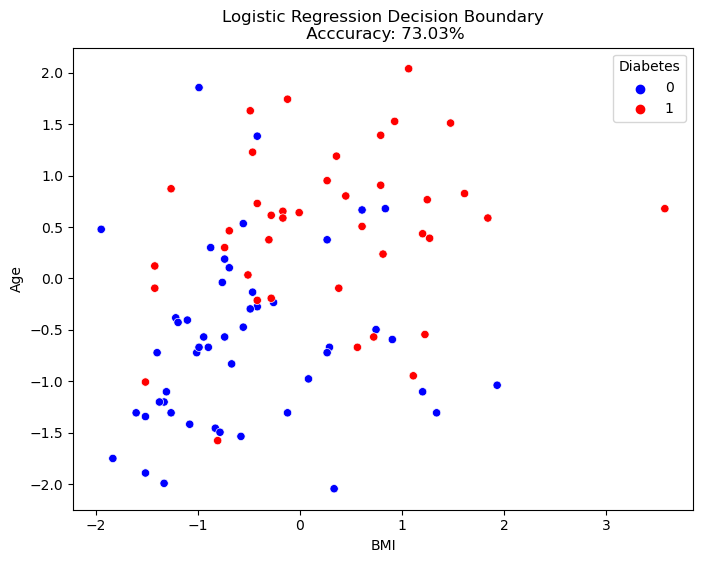

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[: , 8], hue=y_test, palette={
    0: 'blue', 1: 'red'}, marker = 'o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\n Acccuracy: {:.2f}%".format(accuracy*100))
plt.legend(title = "Diabetes", loc="upper right")
plt.show()